In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
path = './victimizacion_robo_objetosydemas.csv'
data=pd.read_csv(path)

In [5]:
autos = {
  "RO2A104": "Herramientas (A)",
  "RO2A106": "Plumas (A)",
  "RO2A107": "Tapacubos (A)",
  "RO2A108": "Parlantes (A)",
  "RO2A109": "Baterias (A)"
}
viviendas = {
  "RO2B101": "Mobiliario (juego de sala, comedor, etc.) (V)",
  "RO2B102": "Equipo electrónico (computador) (V)",
  "RO2B103": "Electrodomésticos (tv, equipo sonido, etc) (V)",
  "RO2B104": "Bolso, mochila, maleta, portafolio (V)",
  "RO2B105": "Joyas, reloj (V)",
  "RO2B106": "Ropa (V)",
  "RO2B107": "Dinero, tarjetas crédito, cheques, documentos (V)",
  "RO2B108": "Teléfono celular (V)",
  "RO2B109": "Bicicleta (V)"
}
personas = {
  "RO2C101": "Personas - Laptop, Ipod, mp3 (P)",
  "RO2C102": "Bolso, maleta, portafolio (P)",
  "RO2C103": "Joyas, reloj (P)",
  "RO2C104": "Ropa (P)",
  "RO2C105": "Dinero, tarjetas crédito,cheques (P)",
  "RO2C106": "Identificación o documentos (P)",
  "RO2C107": "Teléfono celular (P)",
  "RO2C108": "Lentes, gafas (P)",
  "RO2C109": "Bicicleta (P)"
}

## Cuidades con mas delitos

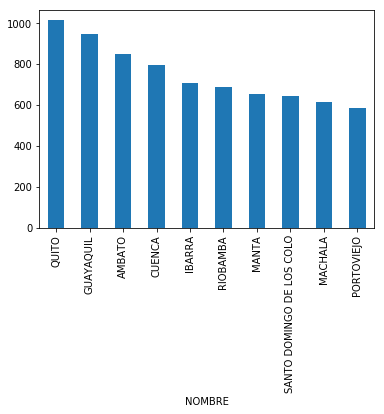

In [6]:
filtered_data = data.groupby(["NOMBRE"]).count()
filtered_data_raw = filtered_data.iloc[:,1]
filtered_data = pd.Series.sort_values(filtered_data_raw, ascending=False).head(10)
filtered_data.plot.bar()
plt.show()

## Ciudades con menos delitos

NOMBRE
VILLA LA UNION (CAJABAMBA    1
TACHINA                      1
SANTIAGO DE MENDEZ           1
CONVENTO                     2
SAN PLACIDO                  2
VALLE HERMOSO                2
PUERTO DE CAYO               2
AYACUCHO                     3
ZAPOTAL                      3
ALHAJUELA (BAJO GRANDE)      3
Name: CIUDAD, dtype: int64


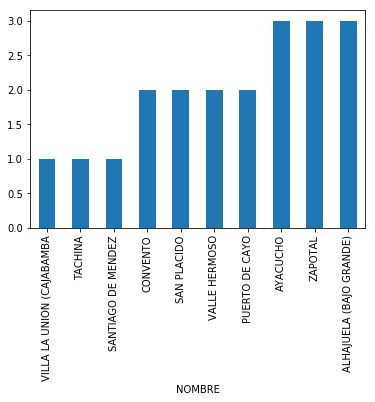

In [7]:
filtered_data_low = pd.Series.sort_values(filtered_data_raw, ascending=True).head(10)
print(filtered_data_low)
filtered_data_low.plot.bar()
plt.show()

## Cantidad de crimenes por categorias (Autos)

Herramientas (A)    446
Tapacubos (A)       218
Parlantes (A)       212
Baterias (A)        203
Plumas (A)          145
dtype: int64


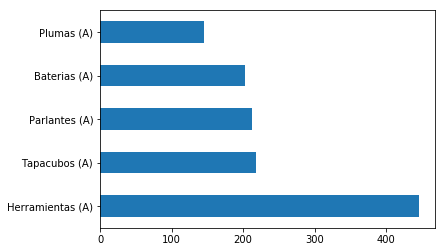

In [8]:
keys_autos = np.asarray(list(autos.keys()))
data_autos = data[keys_autos]
data_autos_count=pd.Series([])
for key in keys_autos:
    label = autos[key]
    value = len(data_autos[data_autos[key]==1])
    data_autos_count=data_autos_count.append(pd.Series({label:value}))
data_autos_count = pd.Series.sort_values(data_autos_count, ascending=False)
data_autos_count.plot.barh()
print(data_autos_count)
plt.show()

## Cantidad de crimenes por categorias (Vivienda)

Electrodomésticos (tv, equipo sonido, etc) (V)       1604
Ropa (V)                                             1147
Dinero, tarjetas crédito, cheques, documentos (V)    1048
Joyas, reloj (V)                                      839
Teléfono celular (V)                                  715
Equipo electrónico (computador) (V)                   655
Bicicleta (V)                                         476
Bolso, mochila, maleta, portafolio (V)                329
Mobiliario (juego de sala, comedor, etc.) (V)         245
dtype: int64


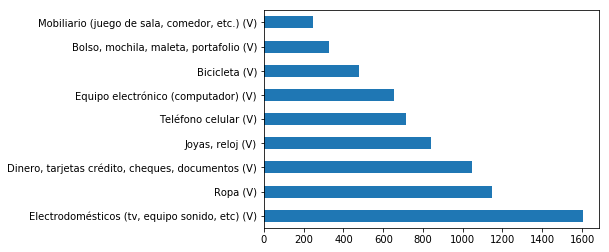

In [9]:
keys_viviendas = np.asarray(list(viviendas.keys()))
data_viviendas = data[keys_viviendas]
data_viviendas_count=pd.Series([])
for key in keys_viviendas:
    label = viviendas[key]
    value = len(data_viviendas[data_viviendas[key]==1])
    data_viviendas_count=data_viviendas_count.append(pd.Series({label:value}))
data_viviendas_count = pd.Series.sort_values(data_viviendas_count, ascending=False)
data_viviendas_count.plot.barh()
print(data_viviendas_count)
plt.show()

## Cantidad de crimenes por categorias (Personal)

Teléfono celular (P)                    8084
Dinero, tarjetas crédito,cheques (P)    6165
Identificación o documentos (P)         2112
Bolso, maleta, portafolio (P)           1827
Joyas, reloj (P)                        1677
Ropa (P)                                 582
Personas - Laptop, Ipod, mp3 (P)         312
Lentes, gafas (P)                        289
Bicicleta (P)                            138
dtype: int64


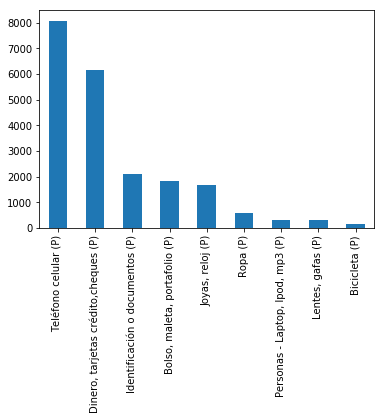

In [10]:
keys_personas = np.asarray(list(personas.keys()))
data_personas = data[keys_personas]
data_personas_count=pd.Series([])
for key in keys_personas:
    label = personas[key]
    value = len(data_personas[data_personas[key]==1])
    data_personas_count=data_personas_count.append(pd.Series({label:value}))
data_personas_count = pd.Series.sort_values(data_personas_count, ascending=False)
data_personas_count.plot.bar()
print(data_personas_count)
plt.show()

## Robos de celulares por ciudad

NOMBRE
GUAYAQUIL                    517
QUITO                        438
AMBATO                       320
MANTA                        310
SANTO DOMINGO DE LOS COLO    276
CUENCA                       266
MACHALA                      265
PORTOVIEJO                   236
RIOBAMBA                     227
IBARRA                       227
Name: RO2C107, dtype: int64


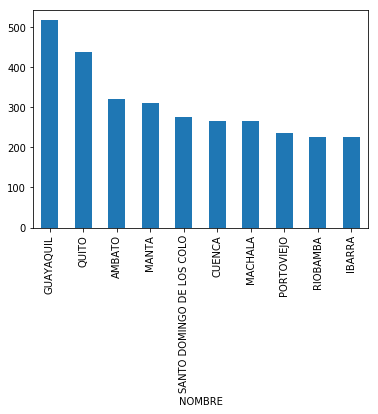

In [11]:
keys_celulares = np.asarray(["NOMBRE","RO2C107"])
data_celulares = data[keys_celulares]
data_celulares = data_celulares[data_celulares['RO2C107']==1]
data_celulares = data_celulares.groupby(["NOMBRE"]).count()
data_celulares = data_celulares.iloc[:,0]
data_celulares = pd.Series.sort_values(data_celulares, ascending=False).head(10)
data_celulares.plot.bar()
print(data_celulares)
plt.show()

## Ciudades con menos celulares robados

NOMBRE
ZUMBI                      1
DR. MIGUEL EGAS CABEZAS    1
EL PANGUI                  1
EL QUINCHE                 1
GUALAQUIZA                 1
HUACHI GRANDE              1
MALCHINGUI                 1
ZUMBA                      1
NAYON                      1
PALORA  (METZERA)          1
Name: RO2C107, dtype: int64


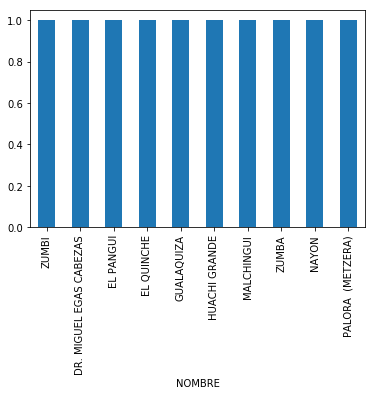

In [12]:
keys_celulares = np.asarray(["NOMBRE","RO2C107"])
data_celulares = data[keys_celulares]
data_celulares = data_celulares[data_celulares['RO2C107']==1]
data_celulares = data_celulares.groupby(["NOMBRE"]).count()
data_celulares = data_celulares.iloc[:,0]
data_celulares = pd.Series.sort_values(data_celulares, ascending=True).head(10)
data_celulares.plot.bar()
print(data_celulares)
plt.show()

## Cantidad de secuestros reportados por ciudad

NOMBRE
GUAYAQUIL              14
ELOY ALFARO (DURAN)     7
QUITO                   5
PORTOVIEJO              5
AMBATO                  3
MACHALA                 3
MANTA                   3
IBARRA                  3
SANTA ROSA              2
SAMBORONDON             2
Name: RO61, dtype: int64


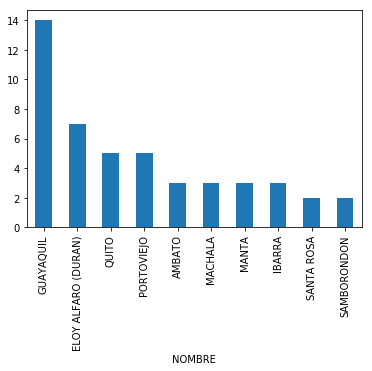

In [13]:
keys_secuestros = np.asarray(["NOMBRE","RO61"])
data_secuestros = data[keys_secuestros]
data_secuestros = data_secuestros[data_secuestros['RO61']==2]
data_secuestros = data_secuestros.groupby(["NOMBRE"]).count()
data_secuestros = data_secuestros.iloc[:,0]
data_secuestros = pd.Series.sort_values(data_secuestros, ascending=False).head(10)
data_secuestros.plot.bar()
print(data_secuestros)
plt.show()

## Maximo, media , minimo de robos de dinero

MAX    359.000000
AVG     23.003731
MIN      1.000000
dtype: float64


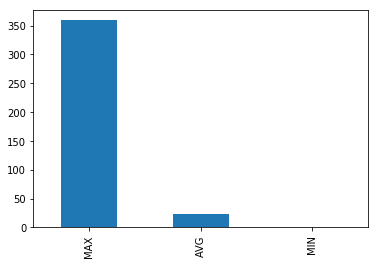

In [14]:
keys_dinero = np.asarray(["NOMBRE","RO2C105"])
data_dinero = data[keys_dinero]
data_dinero = data_dinero[data_dinero['RO2C105']==1]
data_dinero = data_dinero.groupby(["NOMBRE"]).count()
data_dinero = data_dinero.iloc[:,0]
data_dinero = pd.Series({
    "MAX": data_dinero.max(),
    "AVG": data_dinero.mean(),
    "MIN": data_dinero.min()
})
data_dinero.plot.bar()
print(data_dinero)
plt.show()

## Maximo, media , minimo de robos de herramientas autos

MAX    43.00000
AVG     4.12963
MIN     1.00000
dtype: float64


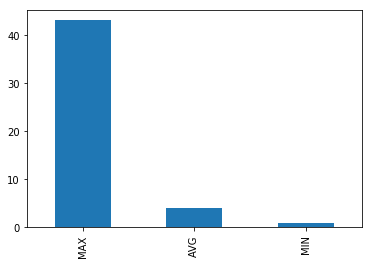

In [15]:
keys_dinero = np.asarray(["NOMBRE","RO2A104"])
data_dinero = data[keys_dinero]
data_dinero = data_dinero[data_dinero['RO2A104']==1]
data_dinero = data_dinero.groupby(["NOMBRE"]).count()
data_dinero = data_dinero.iloc[:,0]
data_dinero = pd.Series({
    "MAX": data_dinero.max(),
    "AVG": data_dinero.mean(),
    "MIN": data_dinero.min()
})
data_dinero.plot.bar()
print(data_dinero)
plt.show()

## Crimenes por categoria

Teléfono celular (P)                                 8084
Dinero, tarjetas crédito,cheques (P)                 6165
Identificación o documentos (P)                      2112
Bolso, maleta, portafolio (P)                        1827
Joyas, reloj (P)                                     1677
Electrodomésticos (tv, equipo sonido, etc) (V)       1604
Ropa (V)                                             1147
Dinero, tarjetas crédito, cheques, documentos (V)    1048
Joyas, reloj (V)                                      839
Teléfono celular (V)                                  715
Equipo electrónico (computador) (V)                   655
Ropa (P)                                              582
Bicicleta (V)                                         476
Herramientas (A)                                      446
Bolso, mochila, maleta, portafolio (V)                329
Personas - Laptop, Ipod, mp3 (P)                      312
Lentes, gafas (P)                                     289
Mobiliario (ju

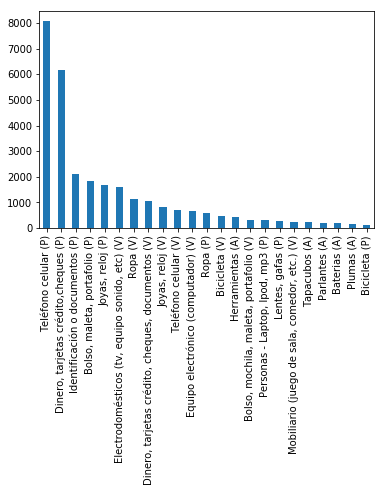

In [16]:
d_totales = personas
d_totales.update(viviendas)
d_totales.update(autos)
keys_totales = np.asarray(list(d_totales.keys()))
data_totales = data[keys_totales]
data_totales_count=pd.Series([])
for key in keys_totales:
    label = d_totales[key]
    value = len(data_totales[data_totales[key]==1])
    data_totales_count=data_totales_count.append(pd.Series({label:value}))
data_totales_count = pd.Series.sort_values(data_totales_count, ascending=False)
data_totales_count.plot.bar()
print(data_totales_count)
plt.show()

## Maximo, media , minimo de delitos

MAX    8084.000000
AVG    1281.217391
MIN     138.000000
dtype: float64


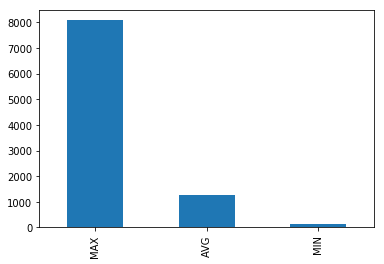

In [17]:
data_total = pd.Series({
    "MAX": data_totales_count.max(),
    "AVG": data_totales_count.mean(),
    "MIN": data_totales_count.min()
})
data_total.plot.bar()
print(data_total)
plt.show()

## Total de delitos por categoria

Personas     21186
Viviendas     7058
Autos         1224
dtype: int64


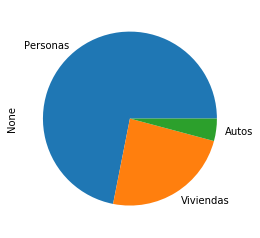

In [18]:
crimenes_por_categoria = pd.Series({
    "Personas": data_personas_count.sum(),
    "Viviendas": data_viviendas_count.sum(),
    "Autos": data_autos_count.sum()
})
crimenes_por_categoria.plot.pie()
print(crimenes_por_categoria)
plt.show()

## Crimenes por categoria Quito

Teléfono celular (P)                                 438
Dinero, tarjetas crédito,cheques (P)                 331
Identificación o documentos (P)                      128
Bolso, maleta, portafolio (P)                        102
Joyas, reloj (P)                                      89
Electrodomésticos (tv, equipo sonido, etc) (V)        56
Dinero, tarjetas crédito, cheques, documentos (V)     39
Herramientas (A)                                      36
Equipo electrónico (computador) (V)                   34
Ropa (V)                                              33
Joyas, reloj (V)                                      32
Ropa (P)                                              29
Lentes, gafas (P)                                     25
Personas - Laptop, Ipod, mp3 (P)                      23
Teléfono celular (V)                                  20
Plumas (A)                                            15
Tapacubos (A)                                         14
Parlantes (A)                  

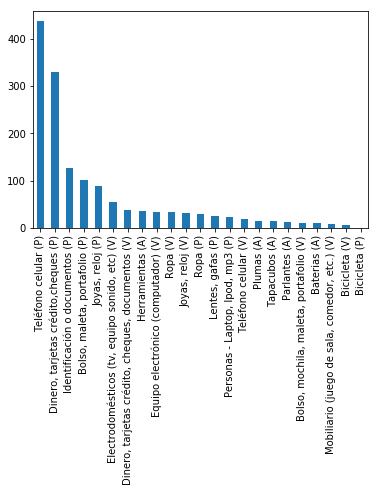

In [19]:
d_totales = personas
d_totales.update(viviendas)
d_totales.update(autos)
keys_totales = np.asarray(list(d_totales.keys()))
data_raw = data[data["NOMBRE"]=="QUITO"]
data_totales = data_raw[keys_totales]
data_totales_count=pd.Series([])
for key in keys_totales:
    label = d_totales[key]
    value = len(data_totales[data_totales[key]==1])
    data_totales_count=data_totales_count.append(pd.Series({label:value}))
data_totales_count = pd.Series.sort_values(data_totales_count, ascending=False)
data_totales_count.plot.bar()
print(data_totales_count)
plt.show()